# Group project: Give Boys a Shot: Examining Online Discussion on Male’s HPV Vaccination on Reddit.com

#Team members: Chu Tsz Hang(53030350); FAN Fei(55529250); SU Youzhen(55543403); WANG Sai(54939553)

#Main agendas: 1.Data collection; 2.Data Clean and Preprocessing; 3.For RQ1: Frequency Counts; 4.For RQ2: Word Counts; 5.For RQ3: Sentiment Analysis; 6.For RQ4: Topic modeling

In [1]:
import praw
import requests
import time
import pandas as pd
import csv
import datetime as dt

In [ ]:
# Data Collection 

In [ ]:
# accessing reddit's API
reddit = praw.Reddit(client_id='client_id',
                     client_secret="client_scret", 
                     user_agent='user_agent)

# Part1: Data Collection

In [ ]:
# Collecting Female HPV titles by using API

alls = reddit.subreddit("all")

topics_dict = { "title":[], "score":[], "id":[], "url":[], "comms_num":[], "created":[], "body":[]}

for submission in alls.search("girl hpv vaccine" and "female hpv vaccine", limit=600):
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)

topics_data = pd.DataFrame(topics_dict)

In [ ]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)
_timestamp = topics_data["created"].apply(get_date)
topics_data = topics_data.assign(timestamp = _timestamp)
topics_data

In [ ]:
len(topics_dict["title"])

In [ ]:
topics_data.to_csv('Female_titles.csv')

In [ ]:
# Collecting Male HPV titles 

alls = reddit.subreddit("all")

topics_dict = { "title":[], "score":[], "id":[], "url":[], "comms_num":[], "created":[], "body":[]}

for submission in alls.search("boy hpv vaccine" and "male hpv vaccine", limit=600):
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)

topics_data = pd.DataFrame(topics_dict)

In [ ]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)
_timestamp = topics_data["created"].apply(get_date)
topics_data = topics_data.assign(timestamp = _timestamp)
topics_data

In [ ]:
len(topics_dict["title"])

In [ ]:
topics_data.to_csv('Male_titles.csv')

In [ ]:
# Collecting all comments within Male HPV vaccine discussions 

In [ ]:
# get all releated posts through search 
alls = reddit.subreddit("all")

topics_dict = { "title":[], 
                "score":[], 
                "url":[], 
                "comms_num": [], 
                "created": [], 
                "body":[]}

for submission in alls.search("male hpv vaccine" or "boy hpv vaccine", limit = 500):
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)
topics_data = pd.DataFrame(topics_dict)

In [ ]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)
    timestamp = topics_data["created"].apply(get_date)
_timestamp = topics_data["created"].apply(get_date)
topics_data = topics_data.assign(timestamp = _timestamp)

In [ ]:
topics_data = pd.DataFrame(topics_dict)

In [ ]:
# establish the list for collecting replies 
all_replies = []
all_posts = []
for submission in alls.search("male hpv vaccine" or "boy hpv vaccine", limit = 500):
    all_posts.append (submission.id)

In [ ]:
all_comments = []

In [ ]:
for post in all_posts: 
    submission = reddit.submission (id = post)
    
    submission.comments.replace_more(limit=None)
    for comment in submission.comments.list():
        all_comments.append(comment.body)
        print("\t"+comment.body)  

In [ ]:
comments_dict = {'comments':all_comments}
comments_data = pd.DataFrame(comments_dict)
comments_data.to_csv('reddit_allcomments')

In [ ]:
df = pd.read_csv('reddit_allcomments',encoding='utf-8')
df.head(10)

# Data Cleaning and Data Preprocessing

In [ ]:
import os 
import numpy as np
import string

In [ ]:
# RQ 1 & RQ 2 
# data cleaning for titles containing "female"

title_fm = pd.read_csv("Female_titles.csv",encoding='utf-8')

# remove spaces
title_fm['title'] = title_fm['title'].fillna("")

# lower case 
title_fm['title'] = title_fm['title'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

# remove punctuation
title_fm['title'] = title_fm['title'].str.replace('[^\w\s]','')

# remove stopwords 
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
title_fm['title'] = title_fm['title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Lemmatization: turn words into its root 
from textblob import Word
title_fm['title'] = title_fm['title'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# remove the duplicated rows
female_title = title_fm.drop_duplicates()

female_title.head(10)

In [ ]:
# data cleaning for titles containing "male"

title_m = pd.read_csv("Male_titles.csv",encoding='utf-8')

# remove spaces
title_m['title'] = title_m['title'].fillna("")

# lower case 
title_m['title'] = title_m['title'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

# remove punctuation
title_m['title'] = title_m['title'].str.replace('[^\w\s]','')

# remove stopwords 
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
title_m['title'] = title_m['title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


# Lemmatization: turn words into its root 
from textblob import Word
title_m['title'] = title_m['title'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# remove the duplicated rows
male_title = title_m.drop_duplicates()

male_title.head(10)

# RQ1 - frequencies of titles 

In [ ]:
freq_fe = pd.Series(' '.join(female_title['title']).split()).value_counts()[:10]
freq_fe

In [ ]:
freq_m = pd.Series(' '.join(male_title['title']).split()).value_counts()[:10]
freq_m

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
tfidf_female = tfidf.fit_transform(female_title['title']) 

In [ ]:
feature_names_fe = tfidf.get_feature_names()
for col in tfidf_female.nonzero()[1]:
    print (feature_names_fe[col], ' - ', tfidf_female[0, col])

In [ ]:
fe_title_list = list (female_title['title'])
fe_title_list = "/ ".join(fe_title_list)
fe_title_list = fe_title_list.strip()
fe_title_list

In [ ]:
import matplotlib.pyplot as plt
x = ['Title with Female', 'Title with Male']
y = [415,428]
plt.bar(x,y)

# RQ2 - word counts and wordclouds

In [ ]:
import wordcloud
from PIL import Image
import numpy as np


fe_symbol = np.array(Image.open('female222.png'))

fe_wc = wordcloud.WordCloud(background_color="white", max_words=500, width=1000, height=860, 
                            mask = fe_symbol, 
                            max_font_size = 1000)
fe_wc.generate(fe_title_list) 
plt.figure(figsize=(50, 50))
plt.imshow(fe_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
m_title_list = list (male_title['title'])
m_title_list = "/ ".join(m_title_list)
m_title_list = m_title_list.strip()
m_title_list

m_symbol = np.array(Image.open('male222.jpeg'))

m_wc = wordcloud.WordCloud(background_color="white", max_words=500, width=1000, height=860, 
                            mask = m_symbol, 
                            max_font_size = 1000)
m_wc.generate(m_title_list) 
plt.figure(figsize=(50, 50))
plt.imshow(m_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# RQ 3 & RQ4: Sentiment analysis and Topic Modeling

In [2]:
# RQ 3 & RQ4
# Cleaning Comments for sentiment analysis and topic modeling

df = pd.read_csv('reddit_allcomments',encoding='utf-8')

# remove spaces
df['comments'] = df['comments'].fillna("")

# lower case 
df['comments'] = df['comments'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

# remove punctuation
df['comments'] = df['comments'].str.replace('[^\w\s]','')

# remove non-English characters
def remove_non_ascii(text):
    return ''.join(i for i in text if ord(i)<128)
df['comments'] = df['comments'].apply(remove_non_ascii)

# remove the rows containing "deleted" 
new_df = df[~df.comments.str.contains("deleted")]
# remove the rows containing "removed" 
new_df = new_df[~df.comments.str.contains("removed")]

# remove the duplicated rows
new_df = new_df.drop_duplicates()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [3]:
#finding and dropping comments with less than 3 words  
count = new_df['comments'].str.split().str.len()

dropped = new_df[~(count>3)].copy()

In [5]:
new_df2=new_df[~(count<4)].copy()

In [6]:
new_df2(10)

,Unnamed: 0,comments
0,0,we should all think about how fucked up this i...
1,1,mystery disease after gardisil vaccine given t...
2,2,its in uk why am i not surprised men need to r...
3,3,socialized medicine ftl how do you think males...
4,4,here is a cached version of the daily mail con...
5,5,cmon guys get real the first paragraph of this...
6,6,did someone in that article really fucking say...
7,7,thats cool ill stop fucking then no diseases f...
8,8,the same brits that killed off alfie
9,9,i think a lot of the time things like this are...


In [7]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data = new_df2.comments.values.tolist()

In [9]:
#Remove http
import re
data = [re.sub('http\S+', "", sent) for sent in data]

<input>:3: DeprecationWarning: invalid escape sequence \S
<input>:3: DeprecationWarning: invalid escape sequence \S
<input>:3: DeprecationWarning: invalid escape sequence \S
<ipython-input-9-077239d5748f>:3: DeprecationWarning: invalid escape sequence \S
  data = [re.sub('http\S+', "", sent) for sent in data]


In [11]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'http'])

/anaconda3/lib/python3.7/site-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]


In [12]:
# turn sentences into words 
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  

data_words = list(sent_to_words(data))

print(data_words[:3])

[['we', 'should', 'all', 'think', 'about', 'how', 'fucked', 'up', 'this', 'is', 'when', 'the', 'nhs', 'thinks', 'its', 'better', 'for', 'men', 'to', 'get', 'life', 'threatening', 'cancer', 'than', 'supply', 'vaccine', 'because', 'of', 'cost', 'considerations'], ['mystery', 'disease', 'after', 'gardisil', 'vaccine', 'given', 'to', 'girls', 'believe', 'this', 'is', 'syncope', 'from', 'the', 'gardasil', 'vaccine', 'video', 'is', 'in', 'spanish', 'side', 'effects', 'overall', 'summary', 'of', 'adverse', 'reactions', 'headache', 'fever', 'nausea', 'and', 'dizziness', 'and', 'local', 'injection', 'site', 'reactions', 'pain', 'swelling', 'erythema', 'pruritus', 'and', 'bruising', 'occurred', 'after', 'administration', 'with', 'gardasil', 'syncope', 'sometimes', 'associated', 'with', 'tonicclonic', 'movements', 'and', 'other', 'seizurelike', 'activity', 'has', 'been', 'reported', 'following', 'vaccination', 'with', 'gardasil', 'and', 'may', 'result', 'in', 'falling', 'with', 'injury', 'observa

In [13]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=1)
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [14]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
   
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [15]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)


nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:10])

[['think', 'fuck', 'nhs', 'think', 'good', 'men_get', 'life_threaten', 'cancer', 'supply', 'vaccine', 'cost', 'consideration'], ['mystery', 'disease', 'gardisil', 'vaccine', 'give', 'girl', 'believe', 'syncope', 'gardasil_vaccine', 'video', 'spanish', 'side_effect', 'overall_summary', 'adverse_reaction', 'headache_fever', 'nausea', 'dizziness', 'local_injection', 'site_reaction', 'pain_swell', 'erythema_pruritus', 'bruising_occurr', 'administration', 'gardasil_syncope', 'sometimes_associat', 'tonicclonic_movement', 'seizurelike_activity', 'reported_follow', 'vaccination', 'gardasil', 'may_result', 'fall', 'injury_observation', 'minute', 'administration', 'recommend', 'see', 'warning', 'precautions_anaphylaxi', 'reported_follow', 'vaccination', 'gardasil', 'btw', 'vaccine_protect', 'strain', 'hpv_strain', 'hpv'], ['surprised', 'man', 'need', 'realize', 'do', 'not', 'look', 'else'], ['socialized_medicine', 'ftl', 'think', 'male', 'system', 'politician', 'get', 'control', 'make', 'healthc

In [16]:
# Create Dictionary
from gensim.corpora import Dictionary
id2word = corpora.Dictionary(data_lemmatized)

#filtering words 
id2word.filter_extremes(no_below=50, no_above=0.8)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1)]]


In [17]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('cancer', 1),
  ('cost', 1),
  ('fuck', 1),
  ('good', 1),
  ('men_get', 1),
  ('nhs', 1),
  ('think', 2),
  ('vaccine', 1)]]

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [21]:
#Using Mallet's Algorithm 

In [ ]:
mallet_path = '/Users/Yokimsu/Desktop/Reddit/mallet-2.0.8/bin/mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=3, id2word=id2word)

In [23]:
from pprint import pprint
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('vaccine', 0.08488418797697148),
   ('give', 0.0294773954567769),
   ('male', 0.024322756281519167),
   ('boy', 0.02137724818137189),
   ('people', 0.019636720667648502),
   ('girl', 0.019235060472173875),
   ('pay', 0.01751684741375463),
   ('free', 0.016981300486455124),
   ('cost', 0.015240772972731735),
   ('hpv_vaccine', 0.014794483866648816)]),
 (1,
  [('make', 0.02911220688615663),
   ('people', 0.0270450679356603),
   ('doctor', 0.02176955707241446),
   ('good', 0.0213819685191964),
   ('thing', 0.019465558450507094),
   ('work', 0.014792963114489351),
   ('issue', 0.012252104821170949),
   ('lot', 0.011649189293942852),
   ('fact', 0.009926573501862579),
   ('care', 0.0094313214616395)]),
 (2,
  [('hpv', 0.06258963786303334),
   ('man', 0.060953746862674796),
   ('woman', 0.053693079956973824),
   ('cancer', 0.03670670491215489),
   ('sex', 0.022006095374686268),
   ('strain', 0.01718806023664396),
   ('virus', 0.015395302975977052),
   ('year', 0.014969523126568662),

In [24]:
def compute_coherence_values(dictionary, corpus, texts, limit):
    coherence_values = []
    model_list = []
    for num_topics in range(3, limit, 1):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [25]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, limit=10)

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data


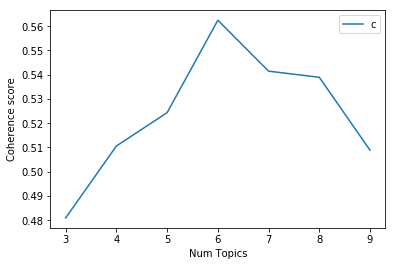

In [26]:
# Show graph presenting the coherence values 
limit=10
x = range(3, limit, 1)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [27]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 3  has Coherence Value of 0.481
Num Topics = 4  has Coherence Value of 0.5106
Num Topics = 5  has Coherence Value of 0.5244
Num Topics = 6  has Coherence Value of 0.5625
Num Topics = 7  has Coherence Value of 0.5415
Num Topics = 8  has Coherence Value of 0.5389
Num Topics = 9  has Coherence Value of 0.5089


In [31]:
# RQ4 - Topic Modeling 
# Using k = 6 as the optimal model 
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=20))

[(0,
  '0.094*"people" + 0.052*"make" + 0.040*"thing" + 0.036*"good" + 0.035*"sex" '
  '+ 0.024*"lot" + 0.019*"time" + 0.018*"talk" + 0.018*"bad" + 0.018*"happen" '
  '+ 0.017*"kid" + 0.015*"call" + 0.014*"kind" + 0.014*"change" + '
  '0.014*"start" + 0.014*"feel" + 0.013*"stop" + 0.013*"die" + 0.012*"put" + '
  '0.012*"life"'),
 (1,
  '0.170*"vaccine" + 0.058*"give" + 0.048*"male" + 0.043*"boy" + 0.039*"girl" '
  '+ 0.030*"hpv_vaccine" + 0.029*"vaccinate" + 0.028*"age" + '
  '0.027*"vaccination" + 0.026*"reason" + 0.024*"female" + 0.022*"benefit" + '
  '0.022*"child" + 0.018*"recommend" + 0.016*"protect" + 0.016*"gardasil" + '
  '0.016*"effect" + 0.015*"effective" + 0.014*"parent" + 0.014*"vaccinated"'),
 (2,
  '0.032*"point" + 0.024*"find" + 0.021*"study" + 0.021*"risk" + 0.020*"case" '
  '+ 0.018*"time" + 0.017*"post" + 0.017*"number" + 0.017*"show" + '
  '0.016*"read" + 0.015*"question" + 0.015*"link" + 0.015*"rate" + '
  '0.014*"comment" + 0.014*"high" + 0.014*"research" + 0.014*"

In [32]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)
df_topic_sents_keywords.head(10)

,Dominant_Topic,Perc_Contribution,Topic_Keywords,0
0,3.0,0.1832,"doctor, pay, free, cost, cover, money, work, s...",we should all think about how fucked up this i...
1,1.0,0.2475,"vaccine, give, male, boy, girl, hpv_vaccine, v...",mystery disease after gardisil vaccine given t...
2,2.0,0.1795,"point, find, study, risk, case, time, post, nu...",its in uk why am i not surprised men need to r...
3,3.0,0.1845,"doctor, pay, free, cost, cover, money, work, s...",socialized medicine ftl how do you think males...
4,2.0,0.2496,"point, find, study, risk, case, time, post, nu...",here is a cached version of the daily mail con...
5,5.0,0.2124,"man, woman, issue, problem, care, feminist, ge...",cmon guys get real the first paragraph of this...
6,1.0,0.1845,"vaccine, give, male, boy, girl, hpv_vaccine, v...",did someone in that article really fucking say...
7,0.0,0.1770,"people, make, thing, good, sex, lot, time, tal...",thats cool ill stop fucking then no diseases f...
8,5.0,0.1830,"man, woman, issue, problem, care, feminist, ge...",the same brits that killed off alfie
9,5.0,0.2479,"man, woman, issue, problem, care, feminist, ge...",i think a lot of the time things like this are...


In [33]:
# saving the results of the Topic Model for accessing orignal comments when doing topics labelling 
df_topic_sents_keywords.to_excel("Reddit_6topics.xlsx")

In [3]:
# RQ3 - sentiment analysis 
from textblob import TextBlob
df_topic_sents_keywords['Sentiment'] = df_topic_sents_keywords['Content'].apply(lambda x: TextBlob(x).sentiment[0])
df_topic_sents_keywords.head()

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Content,Sentiment
0,3,0.1832,"doctor, pay, free, cost, cover, money, work, s...",we should all think about how fucked up this i...,-0.050000
1,1,0.2475,"vaccine, give, male, boy, girl, hpv_vaccine, v...",mystery disease after gardisil vaccine given t...,0.046875
2,2,0.1795,"point, find, study, risk, case, time, post, nu...",its in uk why am i not surprised men need to r...,-0.050000
3,3,0.1845,"doctor, pay, free, cost, cover, money, work, s...",socialized medicine ftl how do you think males...,0.000000
4,2,0.2496,"point, find, study, risk, case, time, post, nu...",here is a cached version of the daily mail con...,-0.027143


In [4]:
def fun(x):
    if x > 0:
        return "postive"
    if x < 0:
        return "negative"
    else:
        return "netural"

df_topic_sents_keywords['Category'] = df_topic_sents_keywords['Sentiment'].apply(lambda x: fun(x))

In [5]:
df_topic_sents_keywords.head(10)

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Content,Sentiment,Category
0,3,0.1832,"doctor, pay, free, cost, cover, money, work, s...",we should all think about how fucked up this i...,-0.050000,negative
1,1,0.2475,"vaccine, give, male, boy, girl, hpv_vaccine, v...",mystery disease after gardisil vaccine given t...,0.046875,postive
2,2,0.1795,"point, find, study, risk, case, time, post, nu...",its in uk why am i not surprised men need to r...,-0.050000,negative
3,3,0.1845,"doctor, pay, free, cost, cover, money, work, s...",socialized medicine ftl how do you think males...,0.000000,netural
4,2,0.2496,"point, find, study, risk, case, time, post, nu...",here is a cached version of the daily mail con...,-0.027143,negative
5,5,0.2124,"man, woman, issue, problem, care, feminist, ge...",cmon guys get real the first paragraph of this...,0.002083,postive
6,1,0.1845,"vaccine, give, male, boy, girl, hpv_vaccine, v...",did someone in that article really fucking say...,-0.300000,negative
7,0,0.1770,"people, make, thing, good, sex, lot, time, tal...",thats cool ill stop fucking then no diseases f...,-0.250000,negative
8,5,0.1830,"man, woman, issue, problem, care, feminist, ge...",the same brits that killed off alfie,-0.100000,negative
9,5,0.2479,"man, woman, issue, problem, care, feminist, ge...",i think a lot of the time things like this are...,0.240625,postive


In [6]:
df_topic_sents_keywords['Category'].value_counts()

postive     7721
negative    3328
netural     2996
Name: Category, dtype: int64

In [7]:
df_topic_sents_keywords['Category'].value_counts().as_matrix()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([7721, 3328, 2996])

In [8]:
df_topic_sents_keywords['Dominant_Topic'].value_counts()

0    3204
1    2490
4    2335
3    2228
2    1980
5    1808
Name: Dominant_Topic, dtype: int64

In [9]:
# draw the sentiment distribution plot
x=np.arange(14035)
y=df_topic_sents_keywords['Sentiment'].as_matrix(columns=None)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


([<matplotlib.patches.Wedge at 0x1a1ed60668>,
 [Text(-1.0866,-0.171166,'positive'),
  Text(0.957914,-0.540741,'negative'),
  Text(0.683211,0.862103,'netural')],
 [Text(-0.592692,-0.0933635,'55.0%'),
  Text(0.522499,-0.29495,'23.7%'),
  Text(0.372661,0.470238,'21.3%')])

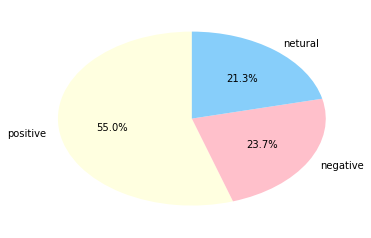

In [13]:
numbers = list(df_topic_sents_keywords['Category'].value_counts().as_matrix())
sentiment=['positive','negative','netural']
colors = ['lightyellow', 'pink', 'lightskyblue']
plt.pie(numbers,labels=sentiment,explode=(0,0,0),autopct='%1.1f%%', colors=colors, startangle=90)